# 1. EDA - Industrial Safety and Health Analytics Dabase

Neste projeto será realizado o processo de EDA (Exploratory Data Analysis) a partir do dataset Industrial Safety and Health Analytics Dabase, que pode ser encontrado no [Kaggle](https://www.kaggle.com/datasets/ihmstefanini/industrial-safety-and-health-analytics-database/), com licensa CC0: Public Domain e enviado por [Eduardo Magalhães Oliveira](https://www.kaggle.com/edumagalhaes).

## 1.1. Os dados, o problema e os objetivos

Não é fácil encontrar datasets de plantas industriais do mundo real, com o intuito de alertar sobre a urgência da necessidade das industrias buscarem entender as razões por trás de acidentes e lesões com seus colaboradores, Eduado Magalhães Oliveira compartilhou este dataset para serem extraídos insights e análises que possam ajudar nessa conscientização. 

Os dados foram colhidos a partir de registros de acidentes em 12 cidades de 3 países diferentes e anomizados por solicitação da empresa que cedeu os dados, de forma que cada linha é uma ocorrência. Sendo as colunas:

- **Data**: timestamp ou date/time da informação
- **Countries**: país onde ocorreu o registro (anomizado).
- **Local**: cidade onde ocorreu o registro (anomizado).
- **Industry sector**: setor industrial ao qual pertence a fábrica.
- **Accident level**: de I à V, registra o quão severo foi o acidente (I significando pouco severo, progredino até V que significa muito severo).
- **Potential Accident Level**: Dependendo do nível do acidente, o banco de dados também registra o quão grave o acidente poderia ter sido (de acordo com outros fatores envolvidos no acidente).
- **Genre**: Genêro do colaborador.
- **Employee or Third Party**: Se a pessoa machucada é empregado ou terceirizado.
- **Critical Risk**: Alguma descrição do tipo de risco envolvido no acidente.happened.

### Objetivos

Portando o objetivo dessa análise será:

- Explorar os dados para verificar se precisam de alguma transformação.
- Entender quais fatores elevam os riscos de acidente.
- Entender a gravidade dos acidentes, e quem está mais sujeito a eles (genêro e setores).
- Descobrir quais são os níveis e níveis críticos de acidentes mais recorrentes.

## 1.2. Importação das bibliotecas e carregamento dos dados

In [3]:
# Bibliotecas para tratar dados
import pandas as pd
import numpy as np
import datetime

# Bibliotecas para EDA
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Configuração para não exibir warnings
import warnings

warnings.filterwarnings('ignore')

# Configuração o estilo dos gráficos para ggplot
plt.style.use('ggplot')

# Configuração para exibir até 15 linhas de um DataFrame do Pandas
pd.set_option('display.max_rows', 15)

# Configuração para exibir todas as colunas de um DataFrame do Pandas
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('data/raw/dados.csv')

# 2. Entendendo os dados

## 2.1. Estrutura do dataframe

In [5]:
print(f"O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O DataFrame possui 439 linhas e 9 colunas.


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numericas = df.select_dtypes(include = numerics)
nao_numericas = df.select_dtypes(exclude = numerics)

print(
    f'Temos {numericas.shape[1]} colunas numéricas e {nao_numericas.shape[1]} colunas não-numéricas'
)

Temos 0 colunas numéricas e 9 colunas não-numéricas


In [7]:
df.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


In [8]:
df.tail()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others
435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others
436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals
437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut
438,2017-07-09 00:00:00,Country_01,Local_04,Mining,I,II,Female,Third Party,Fall prevention (same level)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      439 non-null    object
 1   Countries                 439 non-null    object
 2   Local                     439 non-null    object
 3   Industry Sector           439 non-null    object
 4   Accident Level            439 non-null    object
 5   Potential Accident Level  439 non-null    object
 6   Genre                     439 non-null    object
 7   Employee ou Terceiro      439 non-null    object
 8   Risco Critico             439 non-null    object
dtypes: object(9)
memory usage: 31.0+ KB


In [10]:
# Gosto sempre de checar valores únicos em todas as colunas em busca prévia por inconsistências

for col in df.columns:
    print(f'Coluna: {col}')
    print(df[col].unique())
    print('-' * 65)

Coluna: Data
['2016-01-01 00:00:00' '2016-01-02 00:00:00' '2016-01-06 00:00:00'
 '2016-01-08 00:00:00' '2016-01-10 00:00:00' '2016-01-12 00:00:00'
 '2016-01-16 00:00:00' '2016-01-17 00:00:00' '2016-01-19 00:00:00'
 '2016-01-26 00:00:00' '2016-01-28 00:00:00' '2016-01-30 00:00:00'
 '2016-02-01 00:00:00' '2016-02-02 00:00:00' '2016-02-04 00:00:00'
 '2016-02-06 00:00:00' '2016-02-07 00:00:00' '2016-02-08 00:00:00'
 '2016-02-21 00:00:00' '2016-02-25 00:00:00' '2016-02-09 00:00:00'
 '2016-02-10 00:00:00' '2016-02-15 00:00:00' '2016-02-14 00:00:00'
 '2016-02-13 00:00:00' '2016-02-16 00:00:00' '2016-02-17 00:00:00'
 '2016-02-19 00:00:00' '2016-02-20 00:00:00' '2016-02-18 00:00:00'
 '2016-02-22 00:00:00' '2016-02-24 00:00:00' '2016-02-29 00:00:00'
 '2016-02-26 00:00:00' '2016-02-27 00:00:00' '2016-03-02 00:00:00'
 '2016-03-03 00:00:00' '2016-03-04 00:00:00' '2016-03-05 00:00:00'
 '2016-03-06 00:00:00' '2016-03-09 00:00:00' '2016-03-11 00:00:00'
 '2016-03-13 00:00:00' '2016-03-12 00:00:00' '201

## 2.2. Breves conclusões antes de partir para os próximos passos

- O dataset não possui dados nulos.
- O dataset não possui nenhuma coluna numérica
- A coluna "Potential Accident Level", tem graduação de I à VI.
- Algumas colunas estão com nomenclatura em português, por questão de organização vou por os nomes em inglês.
- Na coluna "Industry Sector" observamos somente industrias de mineração, metalurgia uma classificação de outros.
- Funcionários tercerizados também leva em conta funcionários que trabalham de forma remota, é um ponto interessante.
- Existe um pequeno erro de preenchimento em alguns dados como "\nNot applicable" que seriam "Not applicable", isso será corrigido.
- A coluna "Data" deve ser colocada no dtype datetime.

# 3. Limpeza e manipulação dos dados

## 3.1. Verificação de nulos e duplicados

In [11]:
df.isna().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee ou Terceiro        0
Risco Critico               0
dtype: int64

In [12]:
df.duplicated().sum()

23

### Observação

Considerando o contexto industrial e dos dados, estas duplicatas podem significar um acidente com várias pessoas atingidas. Então vamos olhar isso com mais atenção. 

In [13]:
dupli = df.loc[df.duplicated()]
dupli.head(12)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
42,2016-02-26 00:00:00,Country_01,Local_06,Metals,I,IV,Male,Third Party (Remote),Pressurized Systems / Chemical Substances
43,2016-02-26 00:00:00,Country_01,Local_06,Metals,I,IV,Male,Third Party (Remote),Pressurized Systems / Chemical Substances
44,2016-02-26 00:00:00,Country_01,Local_06,Metals,I,IV,Male,Third Party (Remote),Pressurized Systems / Chemical Substances
45,2016-02-26 00:00:00,Country_01,Local_06,Metals,I,IV,Male,Third Party (Remote),Pressurized Systems / Chemical Substances
46,2016-02-26 00:00:00,Country_01,Local_06,Metals,I,IV,Male,Third Party (Remote),Pressurized Systems / Chemical Substances
47,2016-02-26 00:00:00,Country_01,Local_06,Metals,I,IV,Male,Third Party (Remote),Pressurized Systems / Chemical Substances
48,2016-02-26 00:00:00,Country_01,Local_06,Metals,I,IV,Male,Third Party (Remote),Pressurized Systems / Chemical Substances
49,2016-02-26 00:00:00,Country_01,Local_06,Metals,I,IV,Male,Third Party (Remote),Pressurized Systems / Chemical Substances
50,2016-02-26 00:00:00,Country_01,Local_06,Metals,I,IV,Male,Third Party (Remote),Pressurized Systems / Chemical Substances
51,2016-02-26 00:00:00,Country_01,Local_06,Metals,I,IV,Male,Third Party (Remote),Pressurized Systems / Chemical Substances


In [14]:
dupli.tail(12)

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee ou Terceiro,Risco Critico
53,2016-02-26 00:00:00,Country_01,Local_06,Metals,I,IV,Male,Third Party (Remote),Pressurized Systems / Chemical Substances
89,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others
161,2016-06-16 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Bees
162,2016-06-16 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Bees
163,2016-06-16 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Bees
276,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others
317,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others
359,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals
360,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals
369,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals


Como suspeitava são acidentes que podem atingir várias pessoas ao acontecerem, por conta do conjunto de dados não individualizar cada colaborador acidentado, minha decisão será manter estes dados.

## 3.2. Manipulação de dados e colunas

In [15]:
# Renomeação das colunas

df = df.rename(columns = {'Data': 'Date', 'Employee ou Terceiro': 'Employee or Third Party', 'Risco Critico': 'Critical Risk'})
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


In [16]:
# Converção de Date para datetime

df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk
0,2016-01-01,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed
1,2016-01-02,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems
2,2016-01-06,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools
3,2016-01-08,Country_01,Local_04,Mining,I,I,Male,Third Party,Others
4,2016-01-10,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others


In [17]:
# Conserto do erro de preenchimento '\nNot applicable'

df.loc[df['Critical Risk'] == '\nNot applicable']

,Date,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk
166,2016-06-17,Country_02,Local_08,Metals,IV,V,Male,Employee,\nNot applicable


In [18]:
df['Critical Risk'] = df['Critical Risk'].replace('\nNot applicable', 'Not applicable')

In [19]:
# Salvando o dataset após minhas alterações

df.to_csv('data/ready/dados_limpos.csv', index = False)

# 4. EDA ou Análise Exploratória dos Dados 

### A quantidade de acidentes tem diminuido ao longo do tempo?

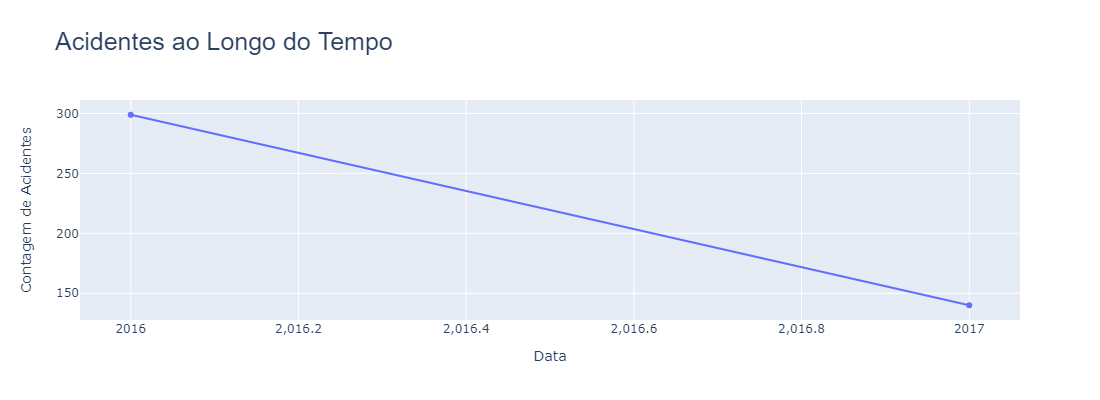

In [47]:
line = go.Scatter(
    x = df['Date'].dt.year.value_counts().index,
    y = df['Date'].dt.year.value_counts().values,
    mode = 'lines+markers',
    name = 'Acidentes ao Longo do Tempo'
)

layout = go.Layout(
    title = 'Acidentes ao Longo do Tempo',
    title_font = {'family': 'Helvetica', 'size': 25},
    xaxis = {'title': 'Data'},
    yaxis = {'title': 'Contagem de Acidentes'},
    width = 1100,
    height = 400
)

fig = go.Figure(
    data = [line],
    layout = layout
)

fig.show(renderer="png")

Começamos com uma boa noticia para o período, existe uma tendência de queda da quantidade de acidentes registrados. A diferença é considerável sendo 46,82% de queda (De 299 em 2016 para 140 em 2017).

### Em que país ocorrem mais acidentes?

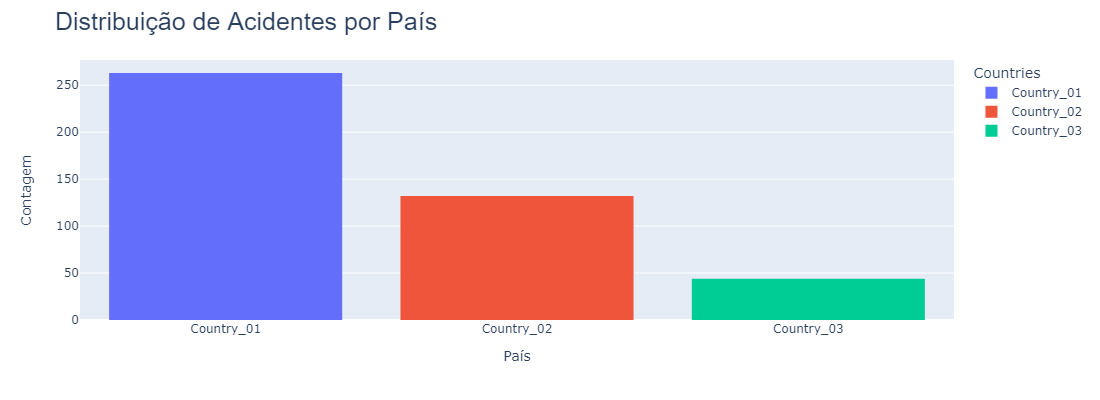

In [48]:
fig = px.histogram(df, x = 'Countries', color = 'Countries')

fig.update_layout(title = 'Distribuição de Acidentes por País', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'País',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.show(renderer="png")

### Em quais cidades ocorrem mais acidentes?

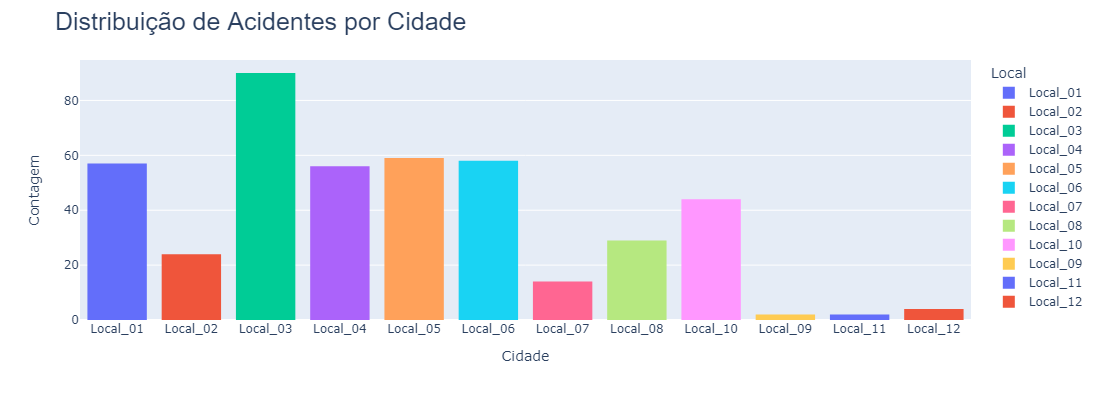

In [49]:
fig = px.histogram(df, x = 'Local', color = 'Local')

fig.update_layout(title = 'Distribuição de Acidentes por Cidade', 
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Cidade',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.show(renderer="png")

### Quais os setores onde são registrados mais acidentes?

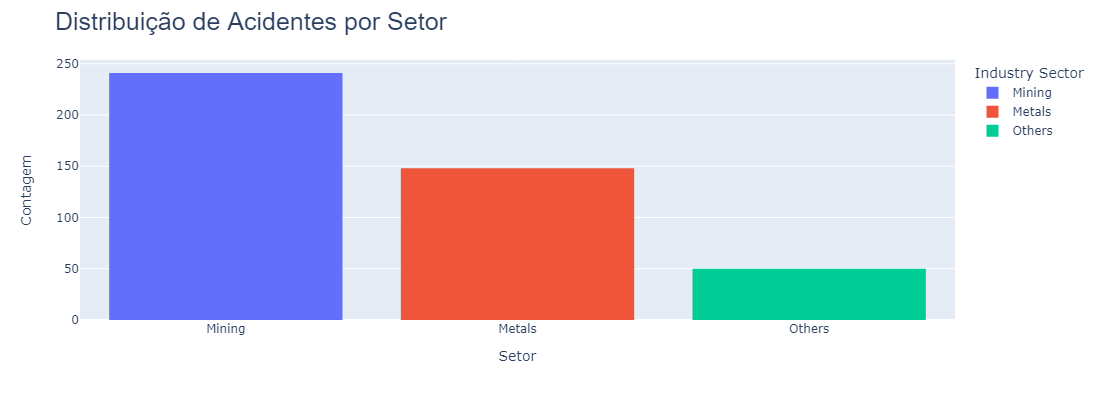

In [50]:
fig = px.histogram(df, x = 'Industry Sector', color = 'Industry Sector')

fig.update_layout(title = 'Distribuição de Acidentes por Setor',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Setor',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.show(renderer="png")

O setor de mineração é onde encontramos o maior número de acidentes (241), é uma ára que envolve alto risco de acidentes em toda sua cadeia produtiva. Desde riscos de acidente mecânicos até acidentes químicos. De acordo com dados do Ministério da Economia no ano de 2020 ocorreram no Brasil 1400 acidentes neste setor, sendo 24 deles fatais como visto em artigo da [AMJ Consultoria](https://amjmineracao.com.br/acidente-de-trabalho-em-area-de-mineracao/#:~:text=Infelizmente%2C%20acidente%20de%20Trabalho%20na,em%202020%2C%20sendo%2042%20fatais.). 

### Qual a distribuição dos níveis de acidente?

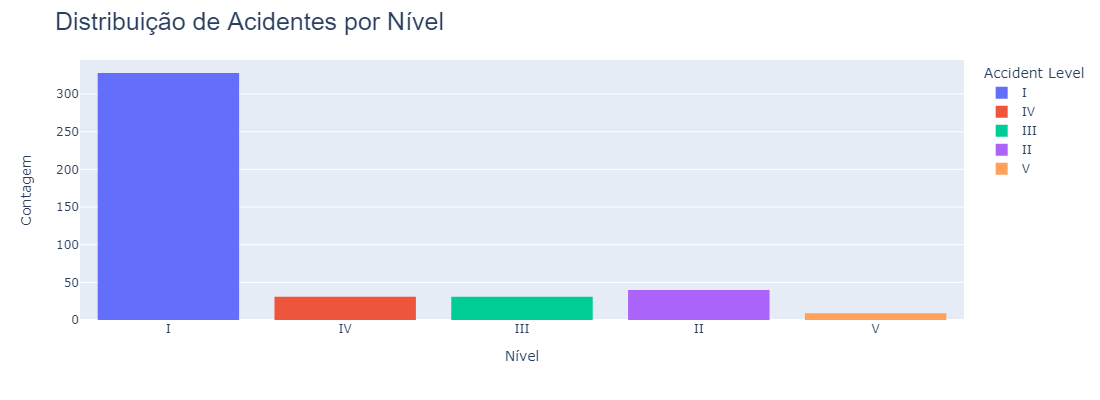

In [51]:
fig = px.histogram(df, x = 'Accident Level', color = 'Accident Level')

fig.update_layout(title = 'Distribuição de Acidentes por Nível',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Nível',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.show(renderer="png")

Maioria dos acidentes estão no nível I, ou seja de pouca severidade, é um bom indicativo. Mas precisamos a frente, fazer um olhar mais profundo nessa distribuição dentro de cada setor industrial.

### Qual a distribuição por nível potencial de acidente?

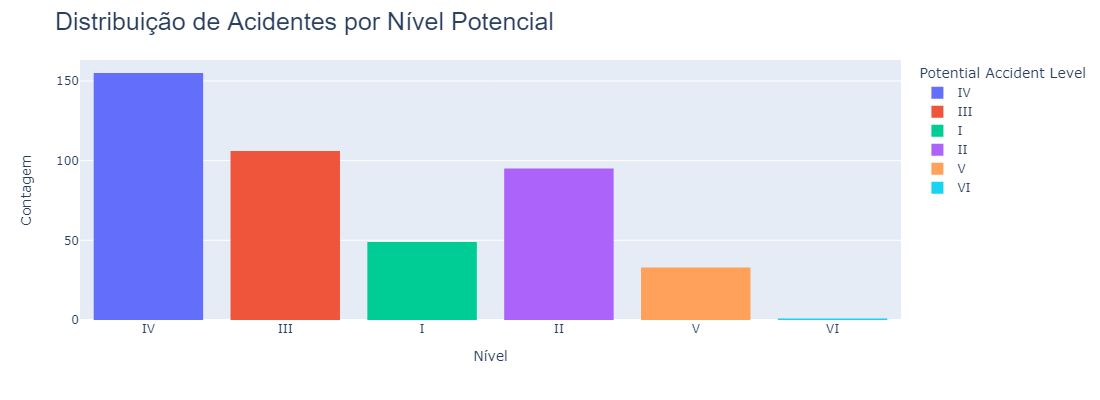

In [52]:
fig = px.histogram(df, x = 'Potential Accident Level', color = 'Potential Accident Level')

fig.update_layout(title = 'Distribuição de Acidentes por Nível Potencial',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Nível',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.show(renderer="png")

Este é um ponto interessante, os acidentes nessas industrias tem potencial altíssimo de severidade, o que pode resultar em mortes ou invalidez. Os acidentes acabarem com baixo nível lesivo é positivo, mas deve se buscar eliminar os riscos em locais com esse potencial de danos ao colaborador.

### Qual a distribuição por sexo dentro da industria?

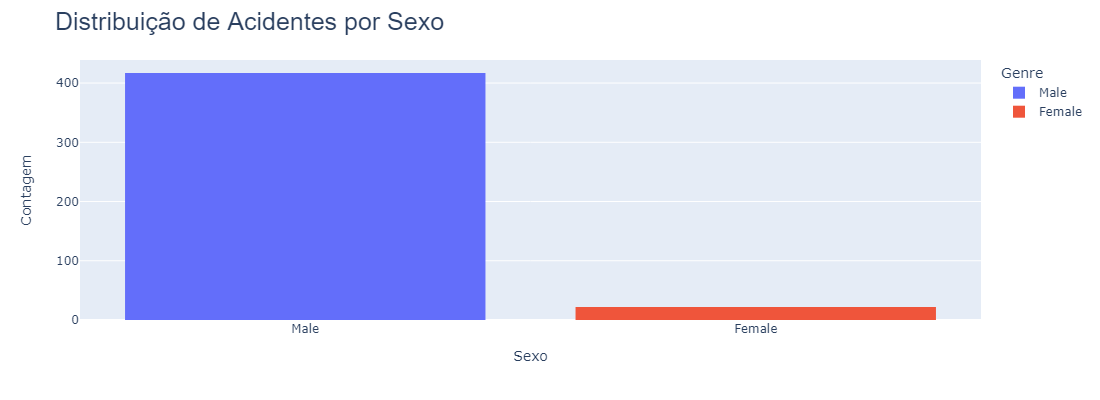

In [53]:
fig = px.histogram(df, x = 'Genre', color = 'Genre')

fig.update_layout(title = 'Distribuição de Acidentes por Sexo',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Sexo',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.show(renderer="png")

Como esperado a maioria dos colaboradores são homens, boa parte do volume de empregos dentro das industrias é braçal o que tradicionalmente é função dos homens. Nestes setores tradicionalmente mulheres estão em posições administrativas e de comando, como nas áreas de Engenharia, Administração e Recursos Humanos, posições envolvidas em menos riscos diretos de acidente.

### Qual a distribuição por tipo de contratação?

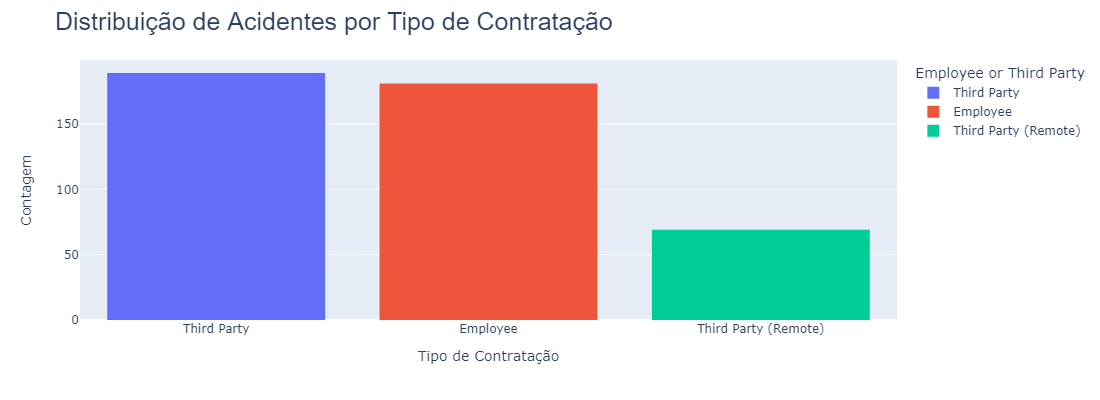

In [54]:
fig = px.histogram(df, x = 'Employee or Third Party', color = 'Employee or Third Party')

fig.update_layout(title = 'Distribuição de Acidentes por Tipo de Contratação',
                  title_font = {'family': 'Helvetica', 'size': 25},
                  xaxis_title = 'Tipo de Contratação',
                  yaxis_title = 'Contagem', 
                  width = 1100, 
                  height = 400)

fig.show(renderer="png")

Existe um alto volume de acidentes envolvendo funcionários terceirizados, sendo eles para trabalho presencial ou remoto. Os dados não são claros com as funções, então fica a dúvida sobre quais os empregos remotos dentro dessas indústrias e porque eles fornecem riscos. 

### Qual a distribuição dos riscos críticos? 

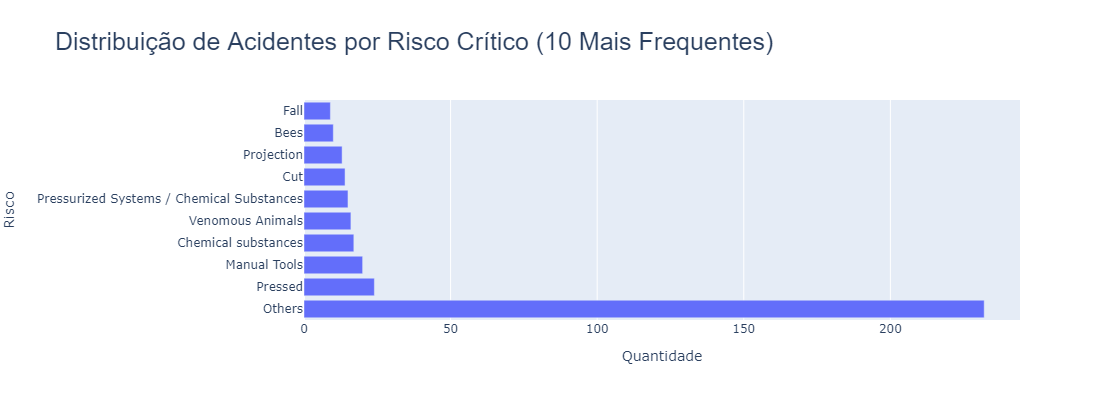

In [55]:
risco = df['Critical Risk'].value_counts().index
contagem = df['Critical Risk'].value_counts().values

barra = go.Bar(y = risco[:10], x = contagem[:10], orientation = 'h')

layout = go.Layout(title = 'Distribuição de Acidentes por Risco Crítico (10 Mais Frequentes)',
                   title_font = {'family': 'Helvetica', 'size': 25},
                   xaxis = {'title': 'Quantidade'},
                   yaxis = {'title': 'Risco'}, 
                   width = 1100, 
                   height = 400)

fig = go.Figure(data = [barra],
                layout = layout)

fig.show(renderer="png")

A classificação Others, deixa a análise um pouco inconclusiva. Mas olhando para outros riscos críticos, é importante observar que Pressed (pressionado), Manual Tools (equipamentos manuais) e Chemical substances (substâncias químicas), são as outras três mais frequentes. O que pode estar ligado a alguns fatores como treinamento dos colaboradores, uso de EPI e falhas humanas. 

### Qual a distribuição dos níveis de acidente em cada setor?

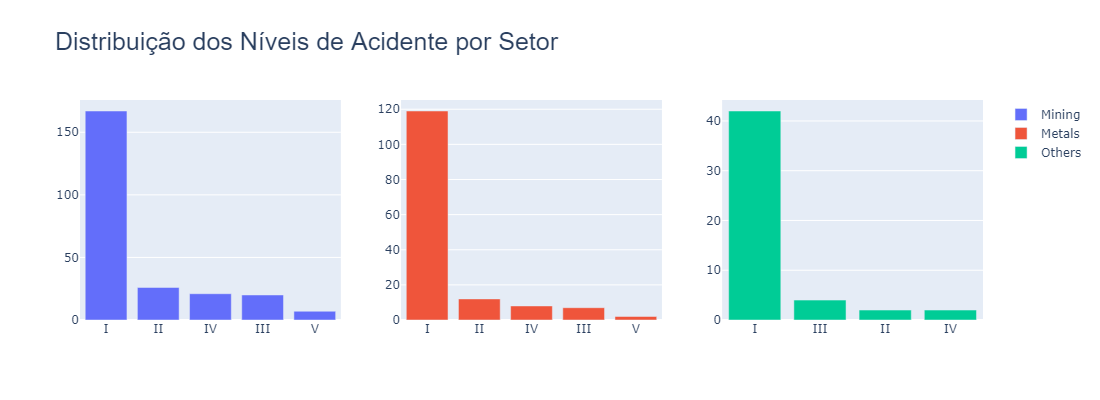

In [56]:
from plotly.subplots import make_subplots

mining = df.loc[df['Industry Sector'] == 'Mining']
metals = df.loc[df['Industry Sector'] == 'Metals']
others = df.loc[df['Industry Sector'] == 'Others']

fig = make_subplots(rows = 1, cols = 3)

fig.add_trace(
    go.Bar(x = mining['Accident Level'].value_counts().index, 
           y = mining['Accident Level'].value_counts().values,
           name = 'Mining'),
    row = 1, col = 1
)

fig.add_trace(
    go.Bar(x = metals['Accident Level'].value_counts().index, 
           y = metals['Accident Level'].value_counts().values,
           name = 'Metals'),
    row = 1, col = 2
)

fig.add_trace(
    go.Bar(x = others['Accident Level'].value_counts().index, 
           y = others['Accident Level'].value_counts().values,
           name = 'Others'),
    row = 1, col = 3
)

fig.update_layout(title = 'Distribuição dos Níveis de Acidente por Setor',
                 title_font = {'family': 'Helvetica', 'size': 25}, 
                  width = 1100, 
                  height = 400)

fig.update_xaxes(tickmode = 'linear')
fig.show(renderer="png")

### Qual a distribuição por níveis de potencial de acidente em cada setor?

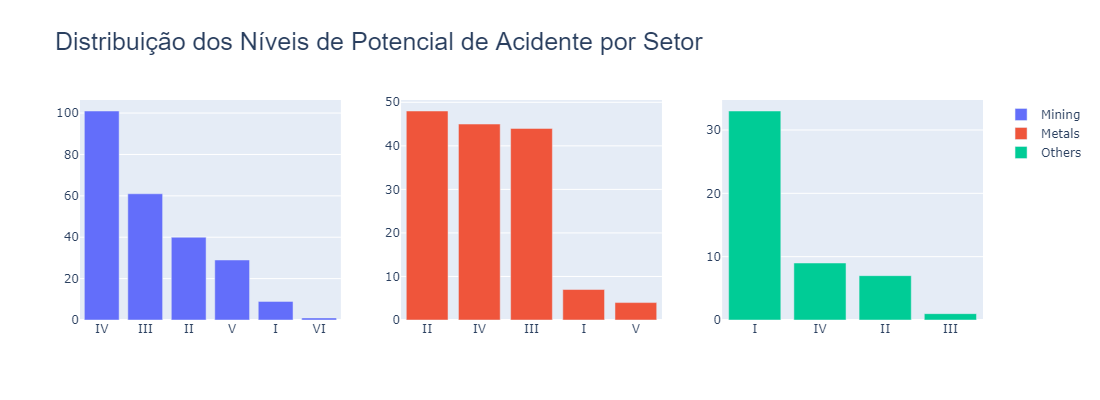

In [57]:
mining = df.loc[df['Industry Sector'] == 'Mining']
metals = df.loc[df['Industry Sector'] == 'Metals']
others = df.loc[df['Industry Sector'] == 'Others']

fig = make_subplots(rows = 1, cols = 3)

fig.add_trace(
    go.Bar(x = mining['Potential Accident Level'].value_counts().index, 
           y = mining['Potential Accident Level'].value_counts().values,
           name = 'Mining'),
    row = 1, col = 1
)

fig.add_trace(
    go.Bar(x = metals['Potential Accident Level'].value_counts().index, 
           y = metals['Potential Accident Level'].value_counts().values,
           name = 'Metals'),
    row = 1, col = 2
)

fig.add_trace(
    go.Bar(x = others['Potential Accident Level'].value_counts().index, 
           y = others['Potential Accident Level'].value_counts().values,
           name = 'Others'),
    row = 1, col = 3
)

fig.update_layout(title = 'Distribuição dos Níveis de Potencial de Acidente por Setor',
                 title_font = {'family': 'Helvetica', 'size': 25}, 
                  width = 1100, 
                  height = 400)

fig.update_xaxes(tickmode = 'linear')
fig.show(renderer="png")

Mineração e Metalúrgia são setores que envolvem altos riscos em potencial, ambientes de alta temperatura, exposição a agentes químicos, choques e equipamentos de díficil manuseio. Apesar disso, maioria dos acidentes registrados acabaram sendo pouco severos, o que é positivo na contenção de danos.

### Tipos de contratação por setor

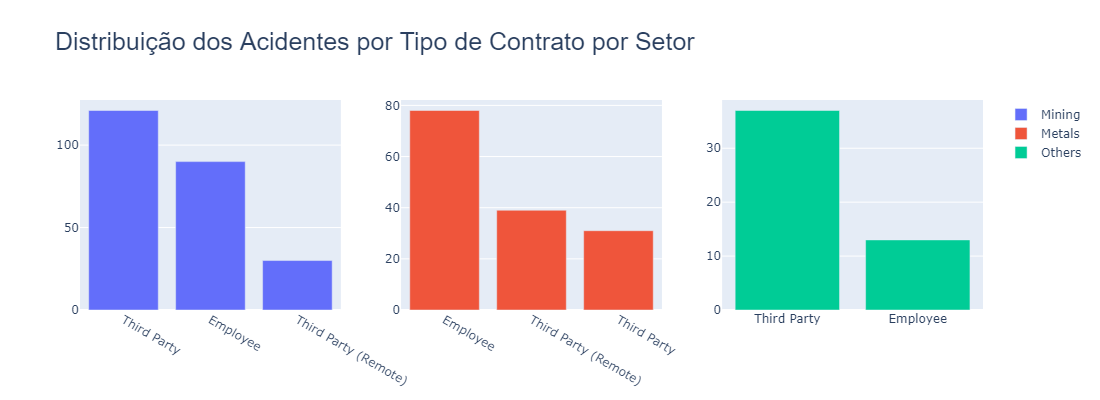

In [58]:
mining = df.loc[df['Industry Sector'] == 'Mining']
metals = df.loc[df['Industry Sector'] == 'Metals']
others = df.loc[df['Industry Sector'] == 'Others']

fig = make_subplots(rows = 1, cols = 3)

fig.add_trace(
    go.Bar(x = mining['Employee or Third Party'].value_counts().index, 
           y = mining['Employee or Third Party'].value_counts().values,
           name = 'Mining'),
    row = 1, col = 1
)

fig.add_trace(
    go.Bar(x = metals['Employee or Third Party'].value_counts().index, 
           y = metals['Employee or Third Party'].value_counts().values,
           name = 'Metals'),
    row = 1, col = 2
)

fig.add_trace(
    go.Bar(x = others['Employee or Third Party'].value_counts().index, 
           y = others['Employee or Third Party'].value_counts().values,
           name = 'Others'),
    row = 1, col = 3
)

fig.update_layout(title = 'Distribuição dos Acidentes por Tipo de Contrato por Setor',
                 title_font = {'family': 'Helvetica', 'size': 25}, 
                  width = 1100, 
                  height = 400)

fig.update_xaxes(tickmode = 'linear')
fig.show(renderer="png")

Somente setor de metalúrgia os acidentados em sua maioria são empregados pela empresa (mas por uma margem muito pequena, só de 1). É necessário investigar meios de diminuir acidentes ocorrendo com colaboradores tercerizados, fornecer treinamentos junto a suas empreas ou treiná-los juntos dos funcionários empregados pela empresa em caso de contratos mais longos. 

### Qual a severidade dos acidentes que cada tipo de contratado está envolvido?

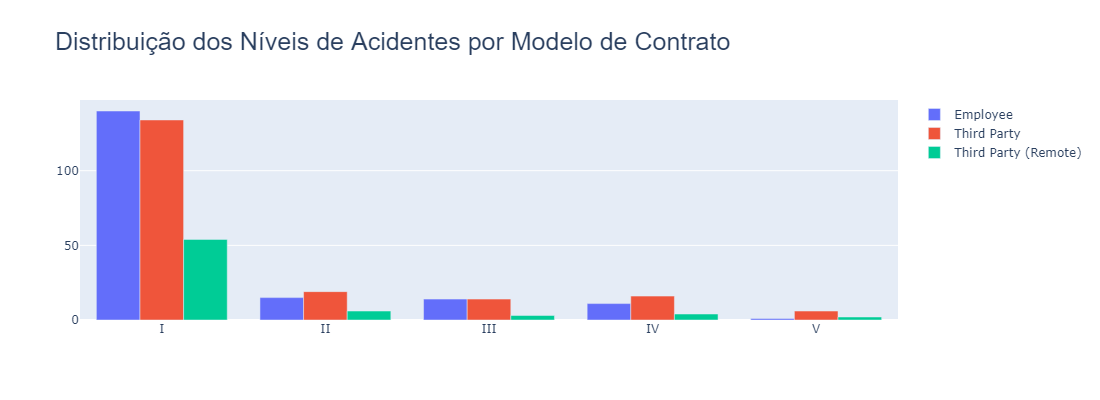

In [59]:
employee = df.loc[df['Employee or Third Party'] == 'Employee']
third_p = df.loc[df['Employee or Third Party'] == 'Third Party']
remote = df.loc[df['Employee or Third Party'] == 'Third Party (Remote)']

fig = go.Figure()

fig.add_trace(
    go.Bar(x = employee['Accident Level'].value_counts().index, 
           y = employee['Accident Level'].value_counts().values,
           name = 'Employee'))

fig.add_trace(
    go.Bar(x = third_p['Accident Level'].value_counts().index, 
           y = third_p['Accident Level'].value_counts().values,
           name = 'Third Party'))

fig.add_trace(
    go.Bar(x = remote['Accident Level'].value_counts().index, 
           y = remote['Accident Level'].value_counts().values,
           name = 'Third Party (Remote)'))

fig.update_layout(title = 'Distribuição dos Níveis de Acidentes por Modelo de Contrato',
                 title_font = {'family': 'Helvetica', 'size': 25}, 
                  width = 1100, 
                  height = 400)

fig.update_xaxes(tickmode = 'linear')
fig.show(renderer="png")

# 5. Conclusões

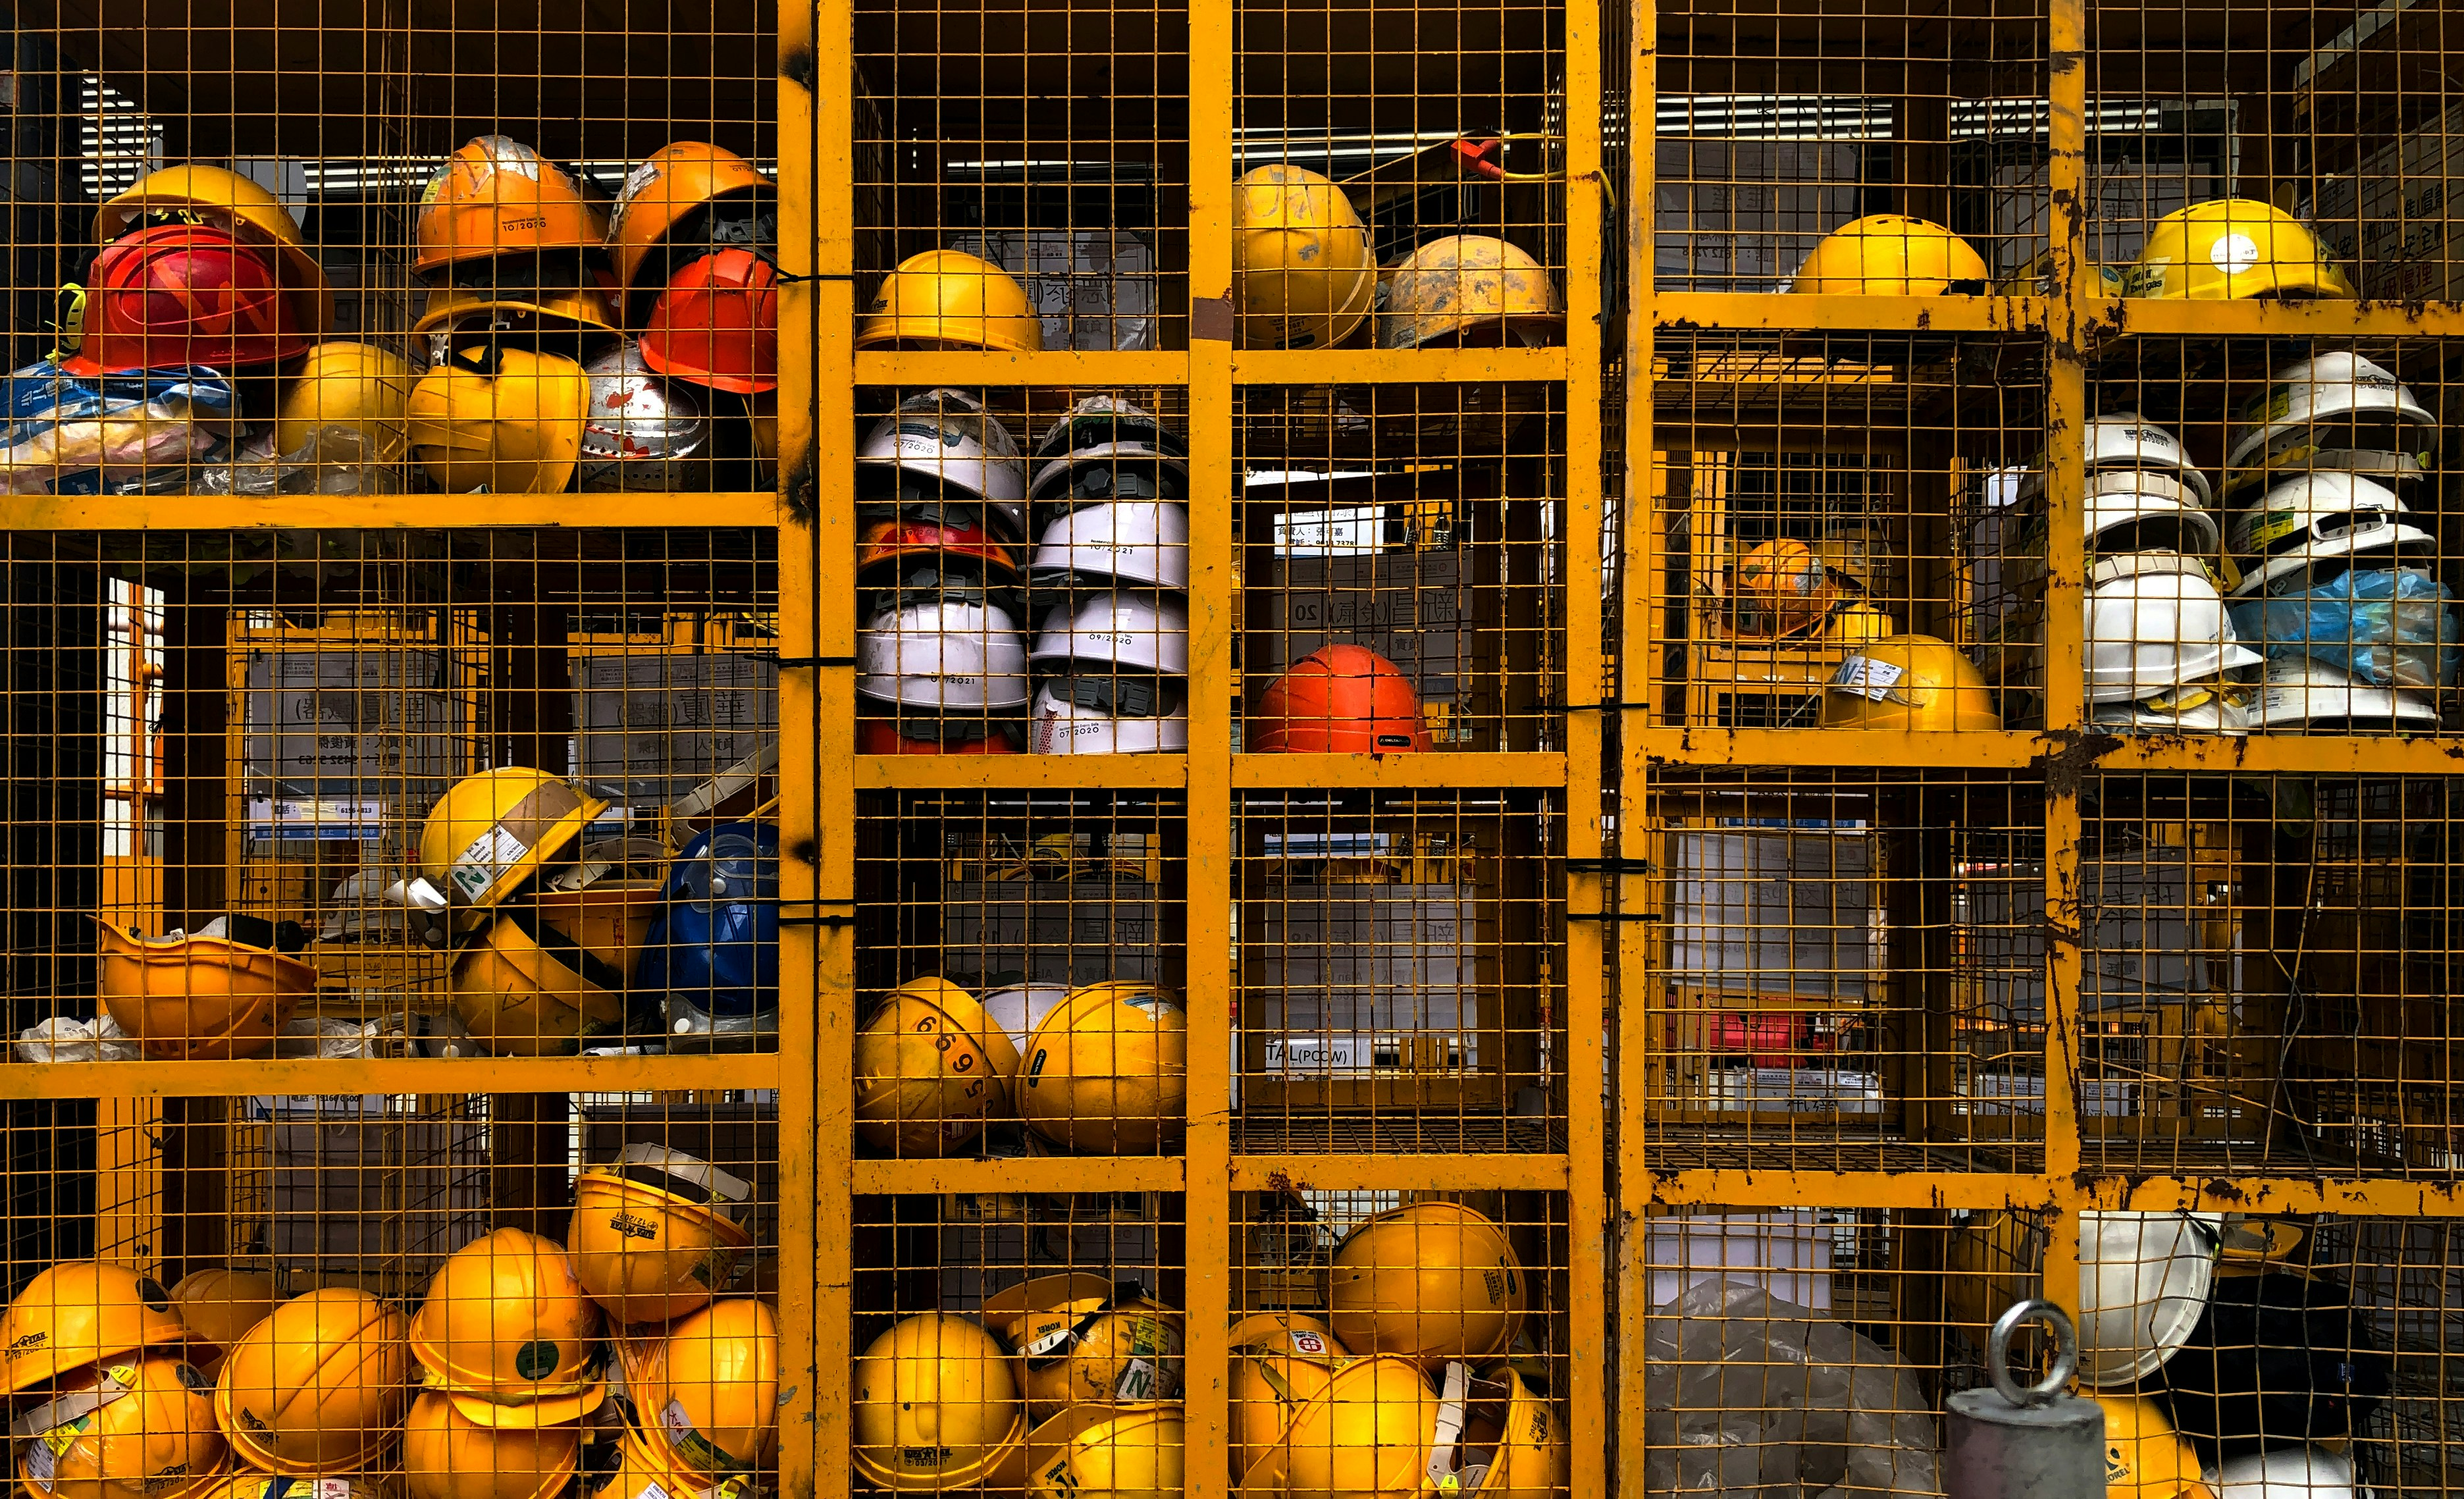

In [33]:
from IPython.display import Image
path = 'img/cap_1.jpg'
Image(filename = path)

O Brasil é um dos países com maiores número de casos de acidentes de trabalho, no ano de 2022 foram registrados 612,9 mil acidentes com 2.538 casos fatais, um estudo da [OIT (Organização Internacional do Trabalho)](https://congressoemfoco.uol.com.br/area/pais/brasil-registra-um-acidente-de-trabalho-a-cada-51-segundos/) aponta que a cada 51 segundos acontece um acidente de trabalho no país. Ainda em outro estudo da OIT, o país foi rankeado em 4º lugar em fatalidades no período de [2002 à 2020](https://prev-one.com.br/artigo/brasil-ocupa-4a-posicao-no-ranking-mundial-de-acidentes-de-trabalho#:~:text=No%20mundo%2C%20o%20Brasil%20ocupa,emprego%20entre%202002%20e%202020.), ficando atrás somente de Índia, China e Indonésia, os setores observados nessa análise tem alto potencial tanto de acidentes de alta severidade quanto óbitos portando é necessário tomar medidas que mudem a cultura de Segurança e Saúde no Trabalho dentro da organizações. 

### Alguns insights 

- Pela baixíssima quantidade de mulheres registradas nos dados, não foi possível fazer uma análise mais aprofundada do recorte de sexo.
- O alto número de acidentes com tercerizados, evoca a necessidade das organizações e das empresas de terceirização reforçarem o treinamento, independente de rotatividade de colaboradores, para evitar acidentes.
- Existe uma necessidade de reforço da cultura de Segurança e Saúde no Trabaho, e constante aprendizado dos colaboradores e gestores.
- Apesar de um pouco inconclusivo, os Riscos Críticos com alto número de ocorrências indicam necessidade de maior treinamento dos colaboradores, ou de rotinas de trabalho menos repetitivas.
- Os potenciais de serveridade dos acidentes nestes setores é muito alta, e maioria dos envolvidos nos acidentes mais graves são os terceirizados, então novamente, é necessária maior conscientização e treinamento destes colaboradores junto as organizações. 